In [38]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt


In [39]:
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [40]:

df.drop(["sepal length (cm)","sepal width (cm)"],axis=1,inplace=True)
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [41]:
rng = range(1,10)
sse = []
for k in rng:
    km = KMeans(n_clusters=k)
    km.fit(df[["petal length (cm)","petal width (cm)"]])
    sse.append(km.inertia_)
%matplotlib inline    


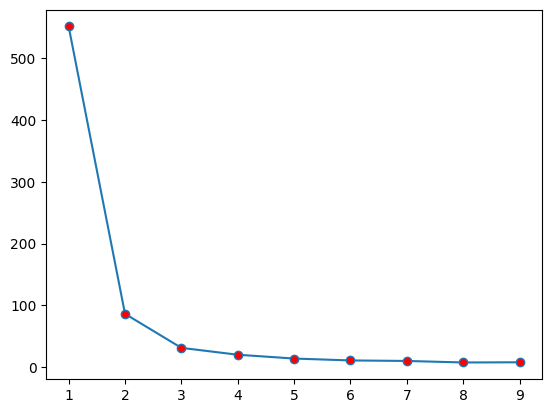

In [42]:
plt.plot(rng,sse,markerfacecolor="red",marker="o")

In [43]:
sse

[550.8953333333334,
 86.39021984551397,
 31.412885668276974,
 20.2996078034854,
 14.130893864755933,
 11.07065234189628,
 10.241111940993063,
 7.7757191590086325,
 8.09264363354037]

In [44]:
scaler = MinMaxScaler()
scaler.fit(df[["petal length (cm)"]])
df["petal length (cm)"] = scaler.transform(df[["petal length (cm)"]])
scaler.fit(df[["petal width (cm)"]])
df["petal width (cm)"] = scaler.transform(df[["petal width (cm)"]])
df

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667
...,...,...
145,0.711864,0.916667
146,0.677966,0.750000
147,0.711864,0.791667
148,0.745763,0.916667


In [49]:
km = KMeans(n_clusters=3)
df['cluster'] = km.fit_predict(df[["petal length (cm)","petal width (cm)"]])
df

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
...,...,...,...
145,0.711864,0.916667,0
146,0.677966,0.750000,0
147,0.711864,0.791667,0
148,0.745763,0.916667,0


In [50]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

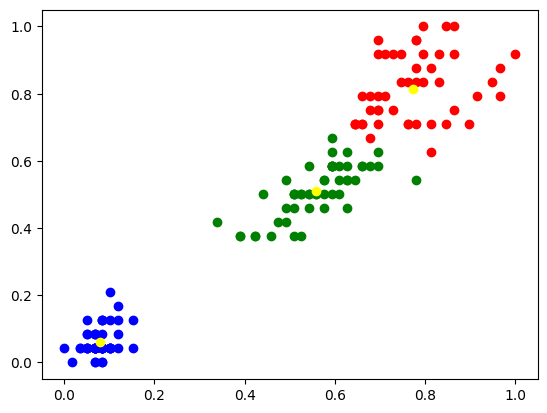

In [53]:
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"],color="red")
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"],color="blue")
plt.scatter(df3["petal length (cm)"],df3["petal width (cm)"],color="green")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="yellow")
